<a href="https://colab.research.google.com/github/Supreme-YS/ML/blob/main/Fashion_Mnist_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models     import Sequential 
from tensorflow.keras.layers     import Activation , Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD , Adam, RMSprop
from tensorflow.keras.utils      import plot_model, to_categorical
from tensorflow.keras.callbacks  import EarlyStopping, ModelCheckpoint

# Ensemble 에 필요한 모듈
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score

from sklearn.model_selection     import train_test_split
# Scaler
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder

# load dataset
from sklearn.datasets            import load_breast_cancer
from tensorflow.keras.datasets   import boston_housing

# 교차검증 
from sklearn.model_selection     import KFold

# 시각화도구
import matplotlib.pyplot as plt
import seaborn as sns

import pandas  as pd
import numpy   as np

# dataset
# from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.datasets.fashion_mnist import load_data

In [ ]:
(X_train, y_train), (X_test, y_test) = load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
for idx in range(0, 10):
    print(idx, class_names[y_train[idx]])

In [ ]:
plt.imshow(X_train[9], cmap=plt.cm.binary)
plt.show()

In [ ]:
num_sample = 4

random_idx = np.random.randint(60000, size=num_sample )
print(random_idx)

plt.figure(figsize=(15, 10))

for i , idx in enumerate(random_idx):
    # print(i, idx)
    img   = X_train[idx, :]
    label = y_train[idx]

    plt.subplot(1, len(random_idx), i+1)
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title('index : {} , label : {}'.format(idx, class_names[label])) 

In [7]:
# loss = 'sparse_categorical_crossentropy'
# optimizer = 'adam', RMSprop
# metrics = accuracy

In [8]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [ ]:
X_train.shape, X_test.shape

In [10]:
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

In [11]:
X_train , _ , y_train , _ = train_test_split(X_train, y_train, test_size = 0.7, random_state = 100)

In [ ]:
X_train.shape, y_train.shape

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [14]:
def get_model():
    model = Sequential()

    model.add(Dense(50, activation='sigmoid', input_shape=(784,)))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [15]:
model = get_model()

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
X_train.shape, y_train.shape

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [ ]:
X_test.shape, y_test.shape

In [22]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 2.1121 - accuracy: 0.2426
Test accuracy : 24%


improve_get_model
- Adam optimizer 사용
- loss = sparse_categorical_crossentropy
- metrics = accuracy


In [23]:
def improve_get_model():
    model = Sequential()

    model.add(Dense(50, activation='sigmoid', input_shape=(784,), kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))
    model.add(Dense(50, activation='sigmoid', kernel_initializer='he_normal'))

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

In [ ]:
model = improve_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [27]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 1.4856 - accuracy: 0.3499
Test accuracy : 35%


improve_activation_get_model
- RMSprop optimizer 사용
- loss = sparse_categorical_crossentropy 사용
- metrics = accuracy

In [ ]:
def improve_activation_get_model():
    model = Sequential()

    model.add(Dense(50, activation='relu', input_shape=(784,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = improve_activation_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [31]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 1.4250 - accuracy: 0.4540
Test accuracy : 45%


Batch Normalization - normalization_adam_get_model
- 각 피쳐별 배치 정규화 진행
- loss = sparse_categorical_crossentropy
- metrics = accuracy
- optimizer = Adam 

In [ ]:
def normalization_adam_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model
    
model = normalization_adam_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

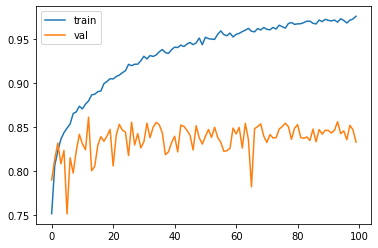

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [35]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 0.9788 - accuracy: 0.8251
Test accuracy : 83%


Batch Normalization - normalization_RMSprop_get_model
- 각 피쳐별 배치 정규화 진행
- loss = sparse_categorical_crossentropy
- metrix = accuracy
- optimizer = RMSprop 

In [ ]:
def normalization_RMSprop_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model
    
model = normalization_RMSprop_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

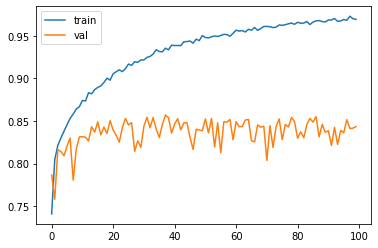

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [39]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 0.9719 - accuracy: 0.8375
Test accuracy : 84%


Dropout, earlystopping - dropout_get_model()
- optimizer = Adam
- loss = sparse_categorical_crossentropy
- metrics = accuracy

In [ ]:
def dropout_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = dropout_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [45]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 1.7255 - accuracy: 0.2598
Test accuracy : 26%


Dropout, earlystopping - dropout_get_model2()
- optimizer = RMSprop
- loss = sparse_categorical_crossentropy
- metrics = accuracy

In [ ]:
def dropout_get_model2():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = dropout_get_model2()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [49]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 1.9101 - accuracy: 0.2681
Test accuracy : 27%


dropout_batch_normalization_get_model()
- optimizer = Adam
- loss = sparse_categorical_crossentropy
- metrics = accuracy

In [50]:
def dropout_batch_normalization_get_model():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = dropout_batch_normalization_get_model()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

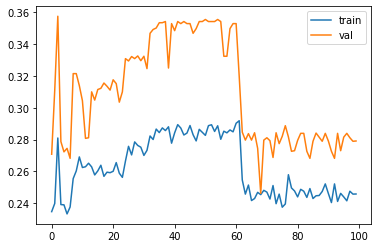

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [53]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

313/313 [==============================] - 1s 2ms/step - loss: 1.6381 - accuracy: 0.2757
Test accuracy : 28%


dropout_batch_normalization_get_model2()
- optimizer = RMSprop
- loss = sparse_categorical_crossentropy
- metrics = accuracy

In [ ]:
def dropout_batch_normalization_get_model2():
    model = Sequential()

    model.add( Dense (50, input_shape=(784,) ) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense (50) )
    model.add( BatchNormalization() )
    model.add( Activation('sigmoid') )
    model.add( Dropout(0.2) )

    model.add(Dense(10, activation='softmax'))

    optimizer = RMSprop(learning_rate=0.01)
    model.compile(optimizer = optimizer,
                  loss ='sparse_categorical_crossentropy',
                  metrics = ['accuracy'])
    return model

model = dropout_batch_normalization_get_model2()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'], loc = 'best')
plt.show()

In [ ]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))

In [ ]:
callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, verbose=1, callbacks=callbacks)

In [ ]:
result = model.evaluate(X_test, y_test)
print('Test accuracy : {}%'.format(round(result[1]*100)))